In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/2023/splashlog

/content/drive/MyDrive/2023/splashlog


In [8]:
!ls

0927_make_yolo_annotations_main.ipynb  main_icons
230204_main_weapons		       scene_images


In [9]:
import glob
import re
import os
from PIL import Image,ImageOps,ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import unicodedata

# -*- coding: utf-8 -*-

yolo_size = 416

resize_size = (200, 200)


In [10]:
base_images = glob.glob('scene_images/*.jpg')

base_images_length = len(base_images)

print(base_images_length)

icons = glob.glob('main_icons/*.png')

icon_images_length = len(icons)
print(len(icons))
print(icons)

4120
64
['main_icons/Jet-Squelcher.png', 'main_icons/Carbon-Roller.png', 'main_icons/N-ZAP85.png', 'main_icons/Glooga-Dualies.png', 'main_icons/Tenta-Brella.png', 'main_icons/Clash-Blaster.png', 'main_icons/52-Gal.png', 'main_icons/Flingza-Roller.png', 'main_icons/Rapid-Blaster-Pro.png', 'main_icons/L-3-Nozzlenose.png', 'main_icons/96-Gal.png', 'main_icons/Bloblobber.png', 'main_icons/Explosher.png', 'main_icons/H-3-Nozzlenose.png', 'main_icons/Bamboozler-14-Mk-I.png', 'main_icons/LACT-450.png', 'main_icons/Splattershot-Jr.png', 'main_icons/Dark-Tetra-Dualies.png', 'main_icons/Ballpoint-Splatling.png', 'main_icons/Goo-Tuber.png', 'main_icons/Sploosh-o-matic.png', 'main_icons/Range-Blaster.png', 'main_icons/Splat-Charger.png', 'main_icons/Dualie-Squelchers.png', 'main_icons/Splat-Dualies.png', 'main_icons/Blaster.png', 'main_icons/Splatana-Wiper.png', 'main_icons/Dapple-Dualies.png', 'main_icons/Aerospray.png', 'main_icons/Squeezer.png', 'main_icons/Luna-Blaster.png', 'main_icons/Heavy-

In [11]:
class_list= []
for path in icons:
    #print(re.findall('/(.*)/', path))
    print(re.findall('/(.*).png', path))
    #print(re.findall('/(.*).png', path)[0].split("/")[1])

    #class_list.append(re.findall('/(.*).png', path)[0].split("/")[1])
    class_list.append(re.findall('/(.*).png', path)[0])
print(class_list)

['Jet-Squelcher']
['Carbon-Roller']
['N-ZAP85']
['Glooga-Dualies']
['Tenta-Brella']
['Clash-Blaster']
['52-Gal']
['Flingza-Roller']
['Rapid-Blaster-Pro']
['L-3-Nozzlenose']
['96-Gal']
['Bloblobber']
['Explosher']
['H-3-Nozzlenose']
['Bamboozler-14-Mk-I']
['LACT-450']
['Splattershot-Jr']
['Dark-Tetra-Dualies']
['Ballpoint-Splatling']
['Goo-Tuber']
['Sploosh-o-matic']
['Range-Blaster']
['Splat-Charger']
['Dualie-Squelchers']
['Splat-Dualies']
['Blaster']
['Splatana-Wiper']
['Dapple-Dualies']
['Aerospray']
['Squeezer']
['Luna-Blaster']
['Heavy-Splatling']
['Dynamo-Roller']
['Splat-Roller']
['Octobrush']
['Splattershot-Pro']
['Undercover-Brella']
['Splattershot']
['Mini-Splatling']
['Rapid-Blaster']
['Hydra-Splatling']
['E-liter-4K']
['Slosher']
['Tri-Slosher']
['Inkbrush']
['Tri-Stringer']
['Splat-Brella']
['Squiffer']
['Splatana-Stamper']
['Sloshing-Machine']
['Splash-o-matic']
['Nautilus-47']
['Hero-Shooter-Replica']
['Splattershot-Nova']
['Big-Swig-Roller']
['Snipewriter-5H']
['Aerospr

In [16]:
import cv2
def take_path_generate_dataset(weapons_dir_path):
    label_info = []
    #icon_type = re.findall('/(.*).png', path)[0].split("/")[0]
    base_path = base_images[random.randint(0, base_images_length-1)]
    base = Image.open(base_path)
    base= base.resize((resize_size)) # リサイズ
    base = base.filter(ImageFilter.BLUR)
    for i in range(0,1):
        logo_relative_positions = [random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]
        logo_position = (int(100*logo_relative_positions[0]), int(100*logo_relative_positions[1]))
        #base_path = base_images[random.randint(0, base_images_length)]

        label = random.choice(class_list)
        
        logo = Image.open(f'{weapons_dir_path}/{label}.png')
        logo_w, logo_h  = logo.size
        #while True:
        logo_scale_x = random.uniform(0.8, 1.0)
        logo_scale_y = random.uniform(0.8, 1.0)

        logo = logo.resize((int(logo_w * logo_scale_x), int(logo_h * logo_scale_y))) # リサイズ
            #print(logo.size)
            #if 200 <logo.size[0] < 300:
            #    break
        #オーグメンテーション
        #if random.randint(0,10) <2:
        #    logo = ImageOps.mirror(logo)

        if random.randint(0,10) <2:
            logo = logo.rotate(random.randint(-10,10), expand=True)
        #if random.randint(0,10) <2:
        #    logo = logo.filter(ImageFilter.BLUR)
        
        base.paste(logo, logo_position, logo)

        #base = base.resize((yolo_size,yolo_size))
        resized_logo_w, resized_logo_h = logo.size
        #print(logo_relative_positions[0],logo_relative_positions[1],resized_logo_w/yolo_size, resized_logo_h/yolo_size)
        #label_info.append([str(icon_path_seed),str(logo_relative_positions[0]),str(logo_relative_positions[1]),str(resized_logo_w/yolo_size), str(resized_logo_h/yolo_size
    return label, base




Range-Blaster


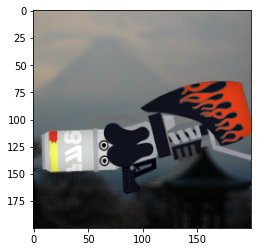

In [17]:
label, base = take_path_generate_dataset("main_icons")
print(label)
plt.imshow(np.array(base))
plt.show()

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset_directory = "230204_main_weapons"
import os

if not os.path.exists(dataset_directory):
   os.makedirs(dataset_directory)

for i in range(1000):
        label, base = take_path_generate_dataset("main_icons")
        if not os.path.exists(f"{dataset_directory}/{label}"):
            print(f"{dataset_directory}/{label}")
            os.mkdir(f"{dataset_directory}/{label}")
        base = base.resize((64,64))
        base.save(f"{dataset_directory}/{label}/{time.time()}.jpg", quality=95)

230204_main_weapons/Slosher-Deco
230204_main_weapons/Splattershot
230204_main_weapons/Snipewriter-5H
230204_main_weapons/Big-Swig-Roller
230204_main_weapons/Hydra-Splatling
230204_main_weapons/Carbon-Roller-Deco
230204_main_weapons/Splattershot-Pro
230204_main_weapons/Dapple-Dualies-Nouveau
230204_main_weapons/Custom-Splattershot-Jr
230204_main_weapons/Bamboozler-14-Mk-I
230204_main_weapons/Splattershot-Nova
230204_main_weapons/Aerospray-RG
230204_main_weapons/Octobrush
230204_main_weapons/Luna-Blaster-Neo
230204_main_weapons/Zink-Mini-Splatling
230204_main_weapons/Tenta-Brella
230204_main_weapons/Inkbrush-Nouveau
